In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split # preprocessing
from imblearn.over_sampling import SMOTE  # preprocessing
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [ ]:
new_cols = ["id", "gender", "age", "hypertension", "heart-disease", "ever-married", "work-type", "Residence-type", "avg-glucose-level", "bmi", "smoking-status", "stroke"]

df.columns = new_cols

In [ ]:
df.head()

,id,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart-disease      5110 non-null   int64  
 4   ever-married       5110 non-null   object 
 5   work-type          5110 non-null   object 
 6   Residence-type     5110 non-null   object 
 7   avg-glucose-level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking-status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart-disease          0
ever-married           0
work-type              0
Residence-type         0
avg-glucose-level      0
bmi                  201
smoking-status         0
stroke                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart-disease        0
ever-married         0
work-type            0
Residence-type       0
avg-glucose-level    0
bmi                  0
smoking-status       0
stroke               0
dtype: int64

In [ ]:
df = df[df['age'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4073 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4073 non-null   object 
 1   age                4073 non-null   float64
 2   hypertension       4073 non-null   int64  
 3   heart-disease      4073 non-null   int64  
 4   ever-married       4073 non-null   object 
 5   work-type          4073 non-null   object 
 6   Residence-type     4073 non-null   object 
 7   avg-glucose-level  4073 non-null   float64
 8   bmi                4073 non-null   float64
 9   smoking-status     4073 non-null   object 
 10  stroke             4073 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 381.8+ KB


In [ ]:
df = df[df['smoking-status'] != 'Unknown']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3256 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3256 non-null   object 
 1   age                3256 non-null   float64
 2   hypertension       3256 non-null   int64  
 3   heart-disease      3256 non-null   int64  
 4   ever-married       3256 non-null   object 
 5   work-type          3256 non-null   object 
 6   Residence-type     3256 non-null   object 
 7   avg-glucose-level  3256 non-null   float64
 8   bmi                3256 non-null   float64
 9   smoking-status     3256 non-null   object 
 10  stroke             3256 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [ ]:
df = df[df['gender'] != 'Other']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3255 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3255 non-null   object 
 1   age                3255 non-null   float64
 2   hypertension       3255 non-null   int64  
 3   heart-disease      3255 non-null   int64  
 4   ever-married       3255 non-null   object 
 5   work-type          3255 non-null   object 
 6   Residence-type     3255 non-null   object 
 7   avg-glucose-level  3255 non-null   float64
 8   bmi                3255 non-null   float64
 9   smoking-status     3255 non-null   object 
 10  stroke             3255 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.2+ KB


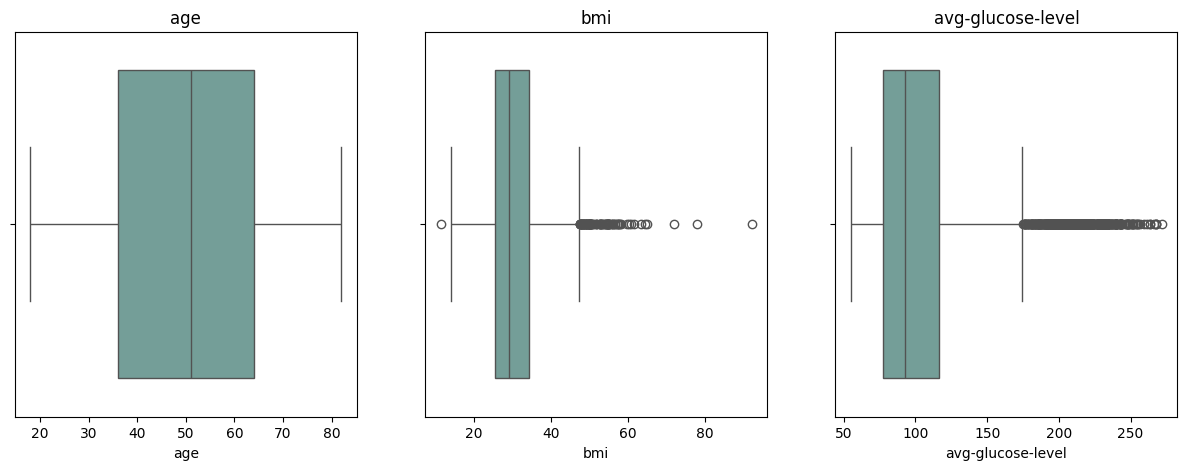

In [ ]:
num_cols = ['age','bmi','avg-glucose-level']

plt.figure(figsize=(15, 5))
for i in range(3) :
    plt.subplot(1,3,i+1)

    sns.boxplot(x=df[num_cols[i]],color='#6DA59D')
    plt.title(num_cols[i])
plt.show()

In [ ]:
df = df[df['bmi'] < 90]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [ ]:
stroke_count =df['stroke'].value_counts() # pandas serie, it contains the number of '1' (stroke) and the number of '0' (no stroke)
print("Stroke percentage: {:.2f}%".format(100 * (stroke_count[1] / (stroke_count[0] + stroke_count[1]))))

Stroke percentage: 5.53%


In [ ]:
gender_count = df['gender'].value_counts()
print('Number of males: ', gender_count['Male'])
print('Number of females: ', gender_count['Female'])

Number of males:  1260
Number of females:  1994


In [ ]:
hypertension_count =df['hypertension'].value_counts()
print("Hypertension percentage: {:.2f}%".format(100 *( hypertension_count[1]/(hypertension_count[0]+hypertension_count[1]))))

Hypertension percentage: 12.51%


In [ ]:
heart_disease_count =df['heart-disease'].value_counts()
print("Hearth disease percentage: {:.2f}%".format(100 * (heart_disease_count[1]/(heart_disease_count[0]+heart_disease_count[1]))))

Hearth disease percentage: 6.33%


In [ ]:
ever_married_count =df['ever-married'].value_counts()
print("Married percentage: {:.2f}%".format(100 * (ever_married_count[0]/(ever_married_count[0]+ever_married_count[1]))))

Married percentage: 79.84%


In [ ]:
work_type_count =df['work-type'].value_counts()
print("Private percentage: {:.2f}%".format(100 * (work_type_count[0]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Self-employed percentage: {:.2f}%".format(100 * (work_type_count[1]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Gov percentage: {:.2f}%".format(100 * (work_type_count[2]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))
print("Never Worked fraction: {:.1f}%".format(100 * (work_type_count[3]/(work_type_count[0]+work_type_count[1]+work_type_count[2]+work_type_count[3]))))

Private percentage: 65.03%
Self-employed percentage: 19.21%
Gov percentage: 15.67%
Never Worked fraction: 0.1%


In [ ]:
residence_type_count =df['Residence-type'].value_counts()
print("Urban percentage: {:.2f}%".format(100 * (residence_type_count[0]/(residence_type_count[0]+residence_type_count[1]))))
print("Rural pergentage: {:.2f}%".format(100 * (residence_type_count[1]/(residence_type_count[0]+residence_type_count[1]))))

Urban percentage: 51.14%
Rural pergentage: 48.86%


In [ ]:
smoking_status_count =df['smoking-status'].value_counts()
print("Never Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[0]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Formely Smoked fraction: {:.2f}%".format(100 * (smoking_status_count[1]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))
print("Smokes fraction: {:.2f}%".format(100 * (smoking_status_count[2]/(smoking_status_count[0]+smoking_status_count[1]+smoking_status_count[2]))))

Never Smoked fraction: 52.64%
Formely Smoked fraction: 24.98%
Smokes fraction: 22.37%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3254 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3254 non-null   object 
 1   age                3254 non-null   float64
 2   hypertension       3254 non-null   int64  
 3   heart-disease      3254 non-null   int64  
 4   ever-married       3254 non-null   object 
 5   work-type          3254 non-null   object 
 6   Residence-type     3254 non-null   object 
 7   avg-glucose-level  3254 non-null   float64
 8   bmi                3254 non-null   float64
 9   smoking-status     3254 non-null   object 
 10  stroke             3254 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 305.1+ KB


In [ ]:
df.head()

,gender,age,hypertension,heart-disease,ever-married,work-type,Residence-type,avg-glucose-level,bmi,smoking-status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
from sklearn.model_selection import train_test_split

features = np.array(df.columns[:-1])
print(features)
X = df.drop(['stroke'], axis = 1) # Set di caratteristiche
y = df['stroke'] # Target da prevedere

['gender' 'age' 'hypertension' 'heart-disease' 'ever-married' 'work-type'
 'Residence-type' 'avg-glucose-level' 'bmi' 'smoking-status']


In [ ]:
y.value_counts()

stroke
0    3074
1     180
Name: count, dtype: int64

<Axes: ylabel='count'>

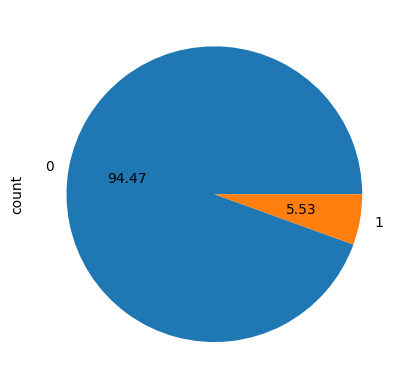

In [ ]:
y.value_counts().plot.pie(autopct = "%.2f")

In [ ]:
print(X)

      gender   age  hypertension  heart-disease ever-married      work-type  \
0       Male  67.0             0              1          Yes        Private   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
5       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
5100    Male  82.0             1              0          Yes  Self-employed   
5102  Female  57.0             0              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train)

      gender   age  hypertension  heart-disease ever-married      work-type  \
2270  Female  32.0             0              0          Yes        Private   
1986  Female  25.0             0              0          Yes        Private   
501   Female  60.0             0              0          Yes        Private   
4767  Female  44.0             0              0          Yes       Govt_job   
1964  Female  29.0             0              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
737     Male  42.0             0              0          Yes        Private   
4388  Female  40.0             0              0          Yes  Self-employed   
3773  Female  38.0             0              0          Yes       Govt_job   
4138  Female  80.0             0              0          Yes  Self-employed   
2557    Male  27.0             0              0          Yes        Private   

     Residence-type  avg-glucose-level   bmi   smok

In [ ]:
print(X_test)

      gender   age  hypertension  heart-disease ever-married work-type  \
1433    Male  54.0             0              0          Yes   Private   
3540  Female  20.0             0              0           No   Private   
415   Female  33.0             0              0          Yes   Private   
2943  Female  27.0             0              0           No   Private   
4318  Female  70.0             0              0          Yes   Private   
...      ...   ...           ...            ...          ...       ...   
862   Female  31.0             0              0          Yes   Private   
3793  Female  24.0             0              0           No   Private   
418   Female  22.0             0              0           No   Private   
4188  Female  27.0             0              0          Yes   Private   
2811    Male  20.0             0              0           No   Private   

     Residence-type  avg-glucose-level   bmi   smoking-status  
1433          Urban              86.26  35.1  f

In [ ]:
gender = pd.get_dummies(X_train["gender"], prefix="gender")
married = pd.get_dummies(X_train["ever-married"], prefix="ever-married")
work = pd.get_dummies(X_train["work-type"], prefix="work-type")
residence = pd.get_dummies(X_train["Residence-type"], prefix="Residence-type")
smoking = pd.get_dummies(X_train["smoking-status"], prefix="smoking-status")

# the features that are one hot encoded
one_hot_features = ["gender", "ever-married", "work-type", "Residence-type", "smoking-status"]
X_train.drop(columns=one_hot_features, inplace=True)


X_tmp_0 = pd.concat([gender, married, work, residence, smoking], axis=1)
dummies_columns = X_tmp_0.columns

X_train = pd.concat([X_train, X_tmp_0], axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

features_to_encode = ["gender_Female", "gender_Male", "ever-married_No", "ever-married_Yes", "work-type_Govt_job", "work-type_Never_worked", "work-type_Private", "work-type_Self-employed","Residence-type_Rural", "Residence-type_Urban","smoking-status_formerly smoked", "smoking-status_never smoked", "smoking-status_smokes"]

encoder = OrdinalEncoder()

X_train[features_to_encode] = encoder.fit_transform(X_train[features_to_encode])

In [ ]:
print(X_train)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
2270  32.0             0              0              61.83  31.3   
1986  25.0             0              0              65.60  33.5   
501   60.0             0              0              65.38  41.2   
4767  44.0             0              0              70.48  20.2   
1964  29.0             0              0              74.33  29.9   
...    ...           ...            ...                ...   ...   
737   42.0             0              0              78.49  31.8   
4388  40.0             0              0             106.76  24.1   
3773  38.0             0              0              93.93  21.5   
4138  80.0             0              0              73.87  33.7   
2557  27.0             0              0             150.10  25.3   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
2270            1.0          0.0              0.0               1.0   
1986            1.0          0.0         

In [ ]:
tmp_features = X_train.columns
print(tmp_features)

Index(['age', 'hypertension', 'heart-disease', 'avg-glucose-level', 'bmi',
       'gender_Female', 'gender_Male', 'ever-married_No', 'ever-married_Yes',
       'work-type_Govt_job', 'work-type_Never_worked', 'work-type_Private',
       'work-type_Self-employed', 'Residence-type_Rural',
       'Residence-type_Urban', 'smoking-status_formerly smoked',
       'smoking-status_never smoked', 'smoking-status_smokes'],
      dtype='object')


In [ ]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# convert to dataframe
X_smote = pd.DataFrame(X_smote, columns=tmp_features)
print(X_smote)

            age  hypertension  heart-disease  avg-glucose-level        bmi  \
0     32.000000             0              0          61.830000  31.300000   
1     25.000000             0              0          65.600000  33.500000   
2     60.000000             0              0          65.380000  41.200000   
3     44.000000             0              0          70.480000  20.200000   
4     29.000000             0              0          74.330000  29.900000   
...         ...           ...            ...                ...        ...   
4915  79.593520             0              0          74.017939  24.720174   
4916  73.021588             1              0         219.138477  28.322475   
4917  33.750525             0              0          77.924288  28.178651   
4918  57.484821             0              0          63.749601  30.524377   
4919  79.000000             0              0          94.521733  23.637365   

      gender_Female  gender_Male  ever-married_No  ever-married

In [ ]:
X_smote = np.round(X_smote)
X_smote[features_to_encode] = encoder.inverse_transform(X_smote[features_to_encode])
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     32.0             0              0               62.0  31.0   
1     25.0             0              0               66.0  34.0   
2     60.0             0              0               65.0  41.0   
3     44.0             0              0               70.0  20.0   
4     29.0             0              0               74.0  30.0   
...    ...           ...            ...                ...   ...   
4915  80.0             0              0               74.0  25.0   
4916  73.0             1              0              219.0  28.0   
4917  34.0             0              0               78.0  28.0   
4918  57.0             0              0               64.0  31.0   
4919  79.0             0              0               95.0  24.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0              True        False            False              True   
1              True        False         

In [ ]:
dummies = pd.from_dummies(X_smote[dummies_columns], sep='_')
print(dummies)

      gender ever-married      work-type Residence-type   smoking-status
0     Female          Yes        Private          Rural     never smoked
1     Female          Yes        Private          Urban     never smoked
2     Female          Yes        Private          Urban  formerly smoked
3     Female          Yes       Govt_job          Rural     never smoked
4     Female          Yes  Self-employed          Rural           smokes
...      ...          ...            ...            ...              ...
4915  Female          Yes        Private          Rural     never smoked
4916    Male          Yes        Private          Urban           smokes
4917  Female          Yes        Private          Rural           smokes
4918  Female          Yes       Govt_job          Rural     never smoked
4919  Female          Yes        Private          Rural     never smoked

[4920 rows x 5 columns]


In [ ]:
print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  \
0     32.0             0              0               62.0  31.0   
1     25.0             0              0               66.0  34.0   
2     60.0             0              0               65.0  41.0   
3     44.0             0              0               70.0  20.0   
4     29.0             0              0               74.0  30.0   
...    ...           ...            ...                ...   ...   
4915  80.0             0              0               74.0  25.0   
4916  73.0             1              0              219.0  28.0   
4917  34.0             0              0               78.0  28.0   
4918  57.0             0              0               64.0  31.0   
4919  79.0             0              0               95.0  24.0   

      gender_Female  gender_Male  ever-married_No  ever-married_Yes  \
0              True        False            False              True   
1              True        False         

In [ ]:
X_smote.drop(columns=dummies_columns, inplace=True)
X_smote = pd.concat([X_smote, dummies], axis=1)

print(X_smote)

       age  hypertension  heart-disease  avg-glucose-level   bmi  gender  \
0     32.0             0              0               62.0  31.0  Female   
1     25.0             0              0               66.0  34.0  Female   
2     60.0             0              0               65.0  41.0  Female   
3     44.0             0              0               70.0  20.0  Female   
4     29.0             0              0               74.0  30.0  Female   
...    ...           ...            ...                ...   ...     ...   
4915  80.0             0              0               74.0  25.0  Female   
4916  73.0             1              0              219.0  28.0    Male   
4917  34.0             0              0               78.0  28.0  Female   
4918  57.0             0              0               64.0  31.0  Female   
4919  79.0             0              0               95.0  24.0  Female   

     ever-married      work-type Residence-type   smoking-status  
0             Yes   

In [ ]:
X_train = X_smote
y_train = y_smote

In [ ]:
df_balanced = pd.DataFrame(X_train, columns=features)
df_balanced['stroke'] = y_train

In [ ]:
df_balanced.shape

(4920, 11)

<Axes: xlabel='stroke', ylabel='count'>

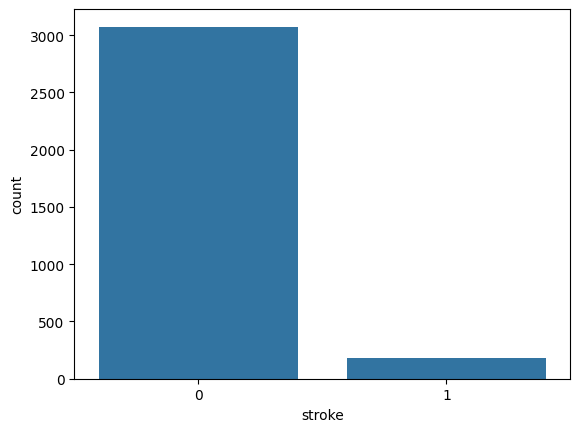

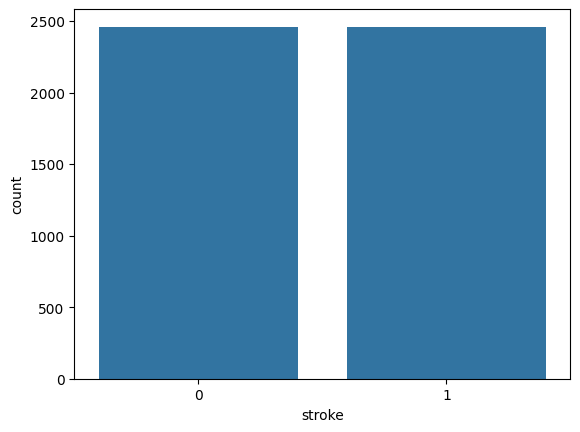

In [ ]:
sns.countplot(x='stroke', data=df)
plt.figure()
sns.countplot(x='stroke', data=df_balanced)

<Axes: xlabel='age_bucket', ylabel='percent'>

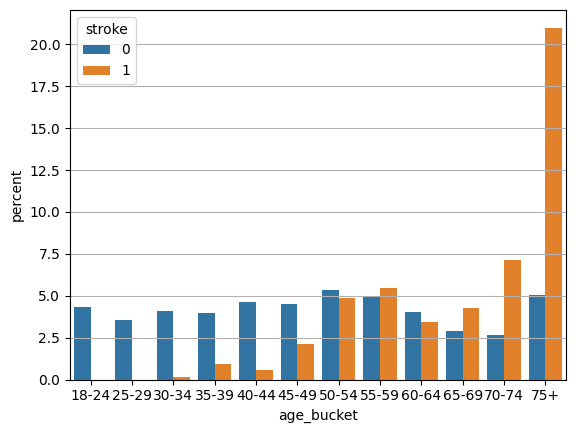

In [ ]:
plt.grid()
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75+']
dataset_bal_copy = df_balanced.copy()
dataset_bal_copy['age_bucket'] = pd.cut(dataset_bal_copy['age'], bins=[17, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 100], labels=age_labels)
sns.countplot(x='age_bucket', hue='stroke', order=age_labels, data=dataset_bal_copy, stat='percent')

<Axes: xlabel='hypertension', ylabel='percent'>

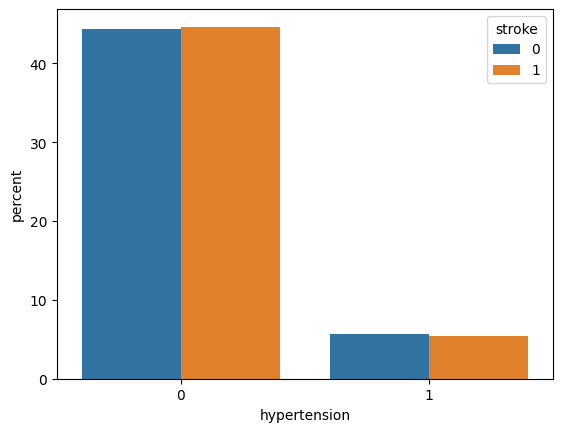

In [ ]:
sns.countplot(x='hypertension', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='heart-disease', ylabel='percent'>

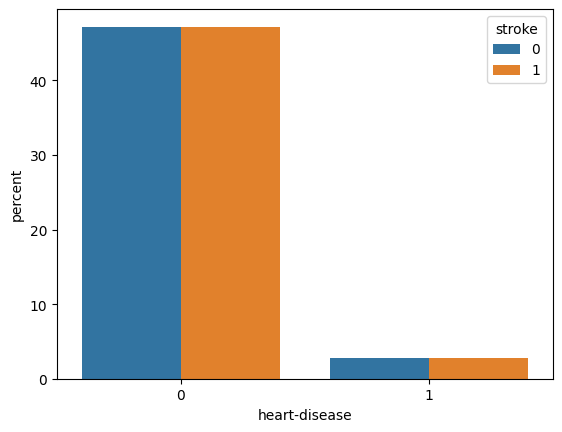

In [ ]:
sns.countplot(x='heart-disease', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='smoking-status', ylabel='percent'>

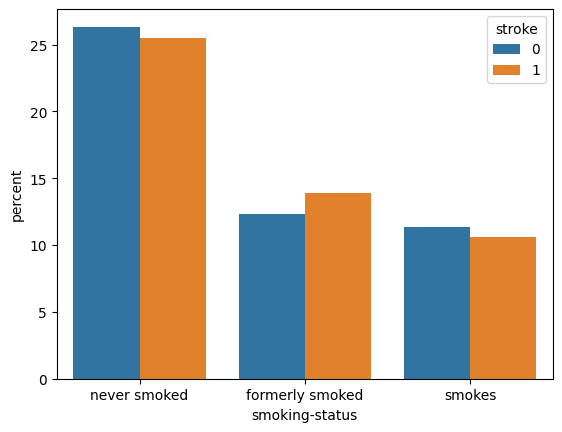

In [ ]:
sns.countplot(x='smoking-status', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='bmi_bucket', ylabel='percent'>

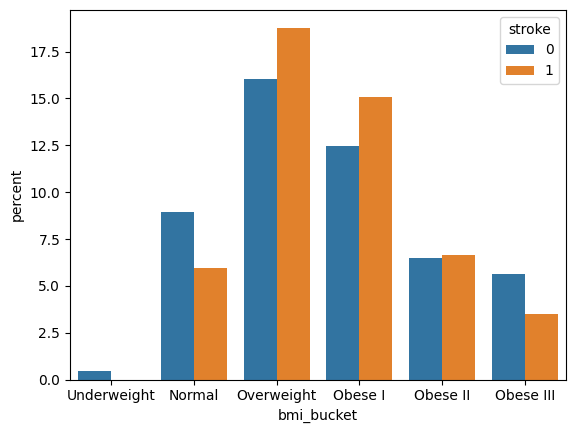

In [ ]:
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
dataset_bal_copy['bmi_bucket'] = pd.cut(dataset_bal_copy['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 100], labels=bmi_labels)
sns.countplot(x='bmi_bucket', hue='stroke',order=bmi_labels,  data=dataset_bal_copy, stat='percent')

<Axes: xlabel='Residence-type', ylabel='percent'>

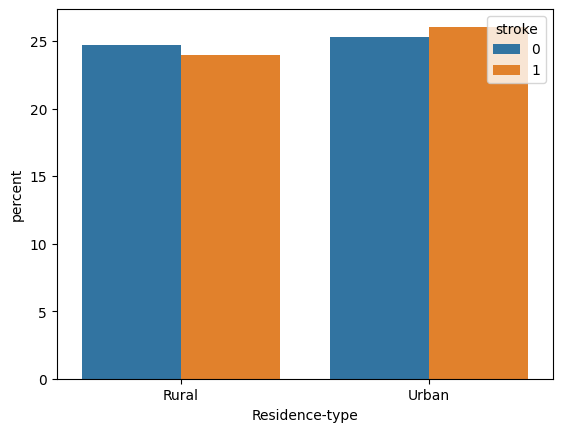

In [ ]:
sns.countplot(x='Residence-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='work-type', ylabel='percent'>

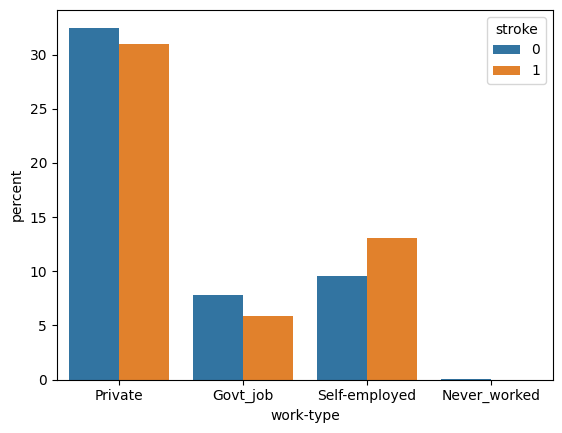

In [ ]:
sns.countplot(x='work-type', hue='stroke', data=df_balanced, stat='percent')

<Axes: xlabel='gender', ylabel='percent'>

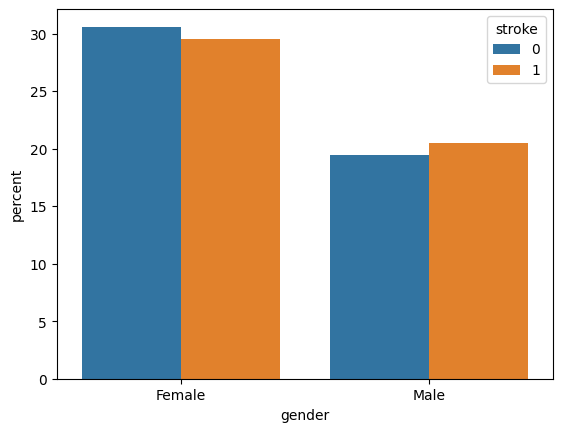

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df_balanced, stat='percent')